<center><h1> Modelling and Use XGboost for Corona Measure Prediction. <h1></center>

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Modelling-and-Use-XGboost-for-Corona-Measure-Prediction.-" data-toc-modified-id="-Modelling-and-Use-XGboost-for-Corona-Measure-Prediction.--1"> Modelling and Use XGboost for Corona Measure Prediction. </a></span></li><li><span><a href="#" data-toc-modified-id="-2"></a></span><ul class="toc-item"><li><span><a href="#Phase-3-Data-Modeling-and-Prediction" data-toc-modified-id="Phase-3-Data-Modeling-and-Prediction-2.1">Phase 3 Data Modeling and Prediction</a></span><ul class="toc-item"><li><span><a href="#Raw-Data-Implementation-and-Input" data-toc-modified-id="Raw-Data-Implementation-and-Input-2.1.1">Raw Data Implementation and Input</a></span></li><li><span><a href="#The-progress-of-when-they-are-public-difference-measures." data-toc-modified-id="The-progress-of-when-they-are-public-difference-measures.-2.1.2">The progress of when they are public difference measures.</a></span></li><li><span><a href="#Data-Processing-+-Feature-Engineering" data-toc-modified-id="Data-Processing-+-Feature-Engineering-2.1.3">Data Processing + Feature Engineering</a></span></li><li><span><a href="#Prediction" data-toc-modified-id="Prediction-2.1.4">Prediction</a></span></li></ul></li><li><span><a href="#Result-conclusion" data-toc-modified-id="Result-conclusion-2.2">Result conclusion</a></span></li></ul></li></ul></div>

## Phase 3 Data Modeling and Prediction
* Analytic and processing data. 
* Feature engineering 
* Data Modeling ( Apply ) 
* Data Validation 
* Data Prediction 
* Visualize the work with result outcome
##### not focus on mathematic. 



### Raw Data Implementation and Input 

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import os


from pyspark.sql import SparkSession 

spark = SparkSession \
    .builder \
    .appName("Python Spark SQL basic example") \
    .config("spark.some.config.option", "some-value") \
    .getOrCreate()


Check current folder, get updated files if available.

In [1]:
# This is the data linked with the project. 
# !wget -N https://www.acaps.org/sites/acaps/files/resources/files/acaps_covid19_government_measures_dataset_0.xlsx
# !pwd    

Read the generated country progress file, read the proper columns as dates.

In [3]:
df_prog = pd.read_csv('zzprogress.csv', parse_dates=[8, 9, 10])
df_prog

,iso2,cname,iso3,ccont,popdata,rsquared,progress,final,start,peak,floor,beta,mu,maxcur
0,AD,Andorra,AND,Europe,76177.0,0.405009,0.292502,2.922351e+03,2020-01-24,2020-05-11,2021-04-09,50.031088,132.358777,299.932303
1,AE,United_Arab_Emirates,ARE,Asia,9770526.0,0.970967,0.810311,6.055558e+04,2020-03-16,2020-05-18,2020-11-02,31.885092,139.117348,9703.833759
2,AF,Afghanistan,AFG,Asia,38041757.0,0.776529,0.504971,6.303103e+04,2020-04-10,2020-06-23,2020-11-30,44.580351,174.835763,7253.463321
3,AL,Albania,ALB,Europe,2862427.0,0.277279,0.364515,7.013855e+03,2020-03-03,2020-07-06,2021-03-28,76.985748,187.528946,472.859199
4,AM,Armenia,ARM,Europe,2957728.0,0.366437,0.014079,1.346352e+06,2020-02-26,2021-01-23,NaT,139.939784,389.394607,68107.927888
5,AT,Austria,AUT,Europe,8858775.0,0.990413,1.134533,1.570162e+04,2020-03-13,2020-03-29,2020-05-12,8.252807,88.659540,8765.056332
6,AU,Australia,AUS,Oceania,25203200.0,0.350105,0.399311,1.983406e+04,2020-02-19,2020-04-14,2020-08-02,36.468181,104.639337,2783.994682
7,AW,Aruba,ABW,America,106310.0,0.859679,1.940997,5.306552e+01,2020-03-29,2020-04-09,2020-05-07,6.277573,99.992380,36.207990
8,BA,Bosnia_and_Herzegovina,BIH,Europe,3300998.0,0.366677,0.437718,1.014758e+04,2020-02-22,2020-06-11,2021-02-15,64.569936,163.117233,809.864710
9,BB,Barbados,BRB,America,287021.0,0.688520,0.710262,1.365694e+02,2020-03-06,2020-04-11,2020-06-21,24.078193,101.911759,28.807400


In [4]:
###!
dfs = pd.read_excel("acaps_covid19_government_measures_dataset.xlsx", sheet_name="Dataset")
# df.info()

dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21779 entries, 0 to 21778
Data columns (total 18 columns):
ID                    21779 non-null int64
ISO                   21779 non-null object
COUNTRY               21779 non-null object
REGION                21779 non-null object
ADMIN_LEVEL_NAME      3009 non-null object
PCODE                 0 non-null float64
LOG_TYPE              21779 non-null object
CATEGORY              21779 non-null object
MEASURE               21779 non-null object
TARGETED_POP_GROUP    7332 non-null object
COMMENTS              21653 non-null object
NON_COMPLIANCE        20650 non-null object
DATE_IMPLEMENTED      21487 non-null datetime64[ns]
SOURCE                21742 non-null object
SOURCE_TYPE           21742 non-null object
LINK                  21745 non-null object
ENTRY_DATE            21779 non-null datetime64[ns]
Alternative source    1610 non-null object
dtypes: datetime64[ns](2), float64(1), int64(1), object(14)
memory usage: 3.0+ MB


In [5]:
###1.2
df = dfs[(dfs["DATE_IMPLEMENTED"] > '2020-01-01')]

df.info()
# filtered_df=df.loc[mask]

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21485 entries, 0 to 21778
Data columns (total 18 columns):
ID                    21485 non-null int64
ISO                   21485 non-null object
COUNTRY               21485 non-null object
REGION                21485 non-null object
ADMIN_LEVEL_NAME      2967 non-null object
PCODE                 0 non-null float64
LOG_TYPE              21485 non-null object
CATEGORY              21485 non-null object
MEASURE               21485 non-null object
TARGETED_POP_GROUP    7208 non-null object
COMMENTS              21375 non-null object
NON_COMPLIANCE        20389 non-null object
DATE_IMPLEMENTED      21485 non-null datetime64[ns]
SOURCE                21452 non-null object
SOURCE_TYPE           21452 non-null object
LINK                  21457 non-null object
ENTRY_DATE            21485 non-null datetime64[ns]
Alternative source    1602 non-null object
dtypes: datetime64[ns](2), float64(1), int64(1), object(14)
memory usage: 3.1+ MB


### 

Remarks about the info results:

    The PCODE column is empty
    ADMIN_LEVEL_NAME and Alternative source are mostly empty
    All rows have ID, COUNTRY, ISO, REGION, LOG_TYPE, CATEGORY, MEASURE, TARGETED_POP_GROUP and ENTRY_DATE
    Not all measures have a source or link

We filter out all rows without a link or source and alternative source. We can also drop the PCODE column.


In [6]:
###1.4
print("There are", len(df["MEASURE"].unique()), "unique measures:\n")

print(df["MEASURE"].value_counts())

There are 35 unique measures:

Economic measures                                               2741
Closure of businesses and public services                       2008
Limit public gatherings                                         1964
Strengthening the public health system                          1681
Isolation and quarantine policies                               1204
Domestic travel restrictions                                     935
Border closure                                                   832
Schools closure                                                  791
Other public health measures enforced                            783
General recommendations                                          757
Awareness campaigns                                              714
Curfews                                                          699
International flights suspension                                 697
Emergency administrative structures activated or established     685
Par

In [7]:
###1.5
df["MEASURE"] = df["MEASURE"].str.lower()
measure_counts = df["MEASURE"].value_counts()

print("There are", len(df["MEASURE"].unique()), "unique measures.")

There are 35 unique measures.


/home/markn/anaconda3/envs/dlwp/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
###1.6
country_groups = df.groupby("COUNTRY")
measures_per_country = country_groups["MEASURE"].value_counts()

print("The Netherlands implemented the following amount of measures:")
country_groups.get_group("Netherlands")[["LOG_TYPE", "MEASURE","COMMENTS"]]



The Netherlands implemented the following amount of measures:


,LOG_TYPE,MEASURE,COMMENTS
14074,Introduction / extension of measures,isolation and quarantine policies,residents with symptoms requested to self-quar...
14075,Introduction / extension of measures,limit public gatherings,limit of public gatherings to 100 persons unti...
14076,Introduction / extension of measures,closure of businesses and public services,"All bars, cafes, restaurants, sports clubs, gy..."
14077,Introduction / extension of measures,general recommendations,Everyone in the Netherlands is requested to ke...
14078,Introduction / extension of measures,schools closure,closure of schools and nurseries from 15 March...
14079,Introduction / extension of measures,economic measures,The SME credit guarantee (BMKB) scheme will be...
14080,Introduction / extension of measures,limit public gatherings,Gatherings of 3 or more people that do not kee...
14081,Introduction / extension of measures,limit public gatherings,Limit the visitors at home to three visitors.
14082,Introduction / extension of measures,limit public gatherings,Public transport and shops are required to tak...
14083,Introduction / extension of measures,emergency administrative structures activated ...,Mayors will have the option of enacting an eme...


####### 1.7
Remarks:
- Introduction and extension measures are grouped. Measure 5337 is for example an extension of 5321. Measure 5328 is an extension of all measures before. This may have to be dealt with.
- The dataset has uncertainties, shown in measure 5332: "CHECK AGAIN CLOSER TO DATE"
- The measures are incomplete. There is no mention of the "Changes in prison-related policies" measure type, [even tough the Netherlands did introduce them on March 13](https://www.rijksoverheid.nl/actueel/nieuws/2020/03/13/dji-treft-preventieve-corona-maatregelen) and [extended them on April 2](https://www.rijksoverheid.nl/actueel/nieuws/2020/04/01/dji-verlengt-corona-maatregelen-t-m-28-april)

Incompleteness is something we cannot deal with manually due to the vast amount of countries and measures. The string "CHECK AGAIN CLOSER TO DATE" can be queried to discover how many uncertainties there are.

In [9]:
### 1.8
df["COMMENTS"].str.contains("CHECK AGAIN CLOSER TO DATE").value_counts()

False    21374
True         1
Name: COMMENTS, dtype: int64

In [10]:
#### 1.9
df["IS_EXTENSION"] = df["COMMENTS"].str.contains(r"(E|e)xten")
df["IS_EXTENSION"].value_counts() 

/home/markn/anaconda3/envs/dlwp/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  
/home/markn/anaconda3/envs/dlwp/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


False    19699
True      1676
Name: IS_EXTENSION, dtype: int64

### The progress of when they are public difference measures. 

/home/markn/anaconda3/envs/dlwp/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


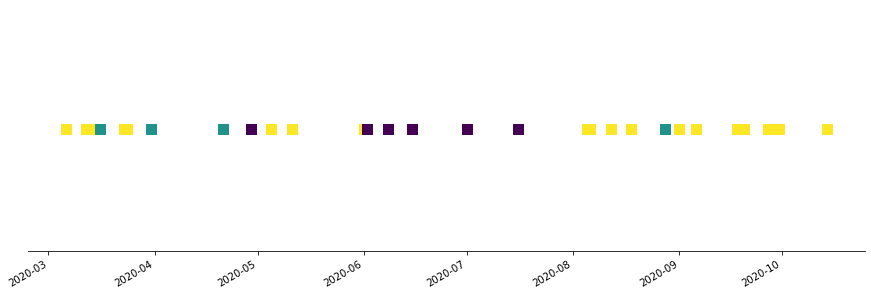

In [11]:
#### 1.9
def calculate_types(group):
  row_count = group.shape[0]
  measure_type = []
  for i in range(row_count):
    if group["LOG_TYPE"].iloc[i] == "Phase-out measure":
      val = 0
    else:
      if group["IS_EXTENSION"].iloc[i]:
        val = 1
      else:
        val = 2
    measure_type.append(val)
  return measure_type

def show_timeline(group):
  row_count = group.shape[0]
  measure_type = calculate_types(group)

  fig, ax = plt.subplots(figsize=(15,5))
  ax.scatter(group["DATE_IMPLEMENTED"], [1]*len(group["DATE_IMPLEMENTED"]), c=measure_type, marker='s', s=100)
  fig.autofmt_xdate()
  ax.yaxis.set_visible(False)
  ax.spines['right'].set_visible(False)
  ax.spines['left'].set_visible(False)
  ax.spines['top'].set_visible(False)
  ax.xaxis.set_ticks_position('bottom')
  plt.show()

nl_group = country_groups.get_group("Netherlands")
show_timeline(nl_group)

Have a look at the countries with the highest estimated part of the population concurrently infected. Therefore, we divide the maximum current from the estimate by the population data. We use a log scale due to large differences and show countries with values above 1 per thousand.

### Data Processing + Feature Engineering
* Build df_prop and sort value
* Make plot disbution

In [12]:
df_prog['mcpop'] = df_prog['maxcur'] / df_prog['popdata']
## Calculate the mcpopuplation per thousand. 
df_progshow = df_prog[df_prog['mcpop'] > 1/1000].sort_values(by=['mcpop'])
df_progshow

,iso2,cname,iso3,ccont,popdata,rsquared,progress,final,start,peak,floor,beta,mu,maxcur,mcpop
136,RU,Russia,RUS,Europe,145872260.0,0.980925,0.772697,8.469095e+05,2020-03-28,2020-05-25,2020-10-28,29.430769,146.103937,146829.948621,0.001007
112,MV,Maldives,MDV,Asia,530957.0,0.867354,0.866063,2.750378e+03,2020-03-31,2020-05-18,2020-09-28,24.671386,139.402536,566.581456,0.001067
142,SG,Singapore,SGP,Asia,5804343.0,0.739169,0.834456,5.287233e+04,2020-02-27,2020-05-20,2020-12-30,41.621119,140.554847,6512.274830,0.001122
164,UK,United_Kingdom,GBR,Europe,66647112.0,0.986508,0.979934,3.199020e+05,2020-03-12,2020-04-23,2020-08-17,21.294705,113.999117,76010.370985,0.001140
78,IT,Italy,ITA,Europe,60359546.0,0.989891,0.991791,2.427528e+05,2020-02-28,2020-04-01,2020-07-04,17.085021,92.484727,71177.390180,0.001179
79,JE,Jersey,JEY,Europe,107796.0,0.850194,0.971570,3.283344e+02,2020-03-15,2020-04-08,2020-06-15,12.305162,98.993702,130.452104,0.001210
141,SE,Sweden,SWE,Europe,10230185.0,0.802043,0.542392,1.284092e+05,2020-02-22,2020-06-07,2021-03-24,52.984713,158.960667,12453.349180,0.001217
109,MS,Montserrat,MSF,America,4991.0,0.354553,0.802430,1.370836e+01,2020-03-21,2020-04-10,2020-06-06,10.125194,100.858733,6.464036,0.001295
93,LI,Liechtenstein,LIE,Europe,38378.0,0.906384,1.007193,8.240727e+01,2020-03-11,2020-03-25,2020-05-04,6.915262,84.525142,52.584872,0.001370
138,SA,Saudi_Arabia,SAU,Asia,34268529.0,0.872429,0.387767,5.002959e+05,2020-03-18,2020-07-05,2021-05-02,53.688860,186.996146,47912.896292,0.001398


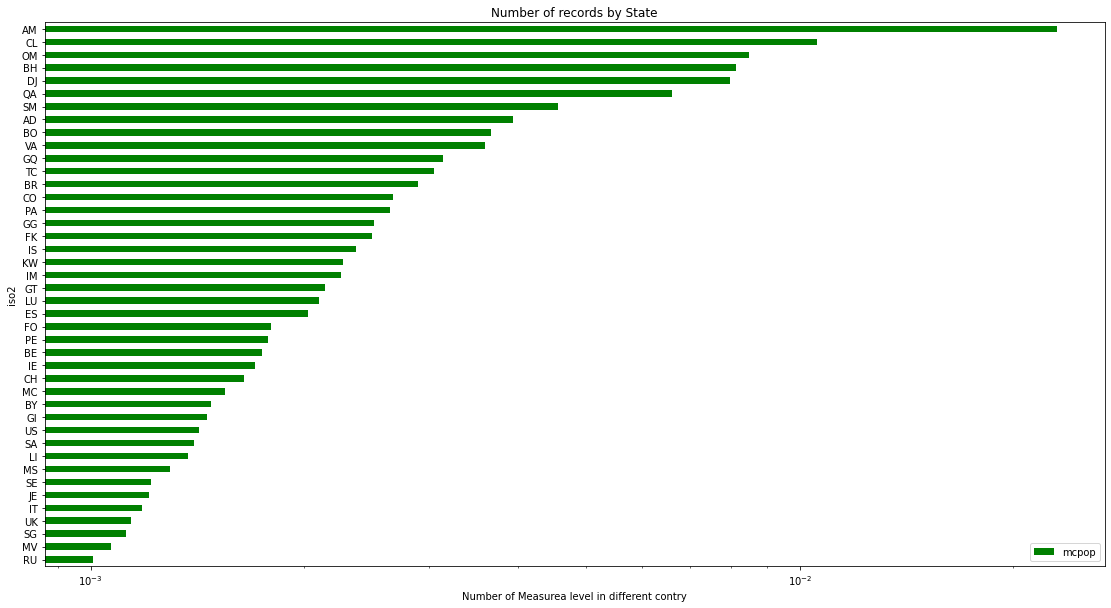

In [13]:
# Creating distribution
x = 'iso2'
y = 'mcpop'
# Set color 
my_colors = 'Green'
# axs.hist(x, bins = n_bins)
fig = df_progshow.plot(
    x, y, kind='barh', logx=True, figsize=(19, 10), grid=False, color=my_colors, label='mcpop', )
    
## Creating name
plt.xlabel('Number of Measurea level in different contry')
plt.title('Number of records by State')

plt.show()


The log of infected seems a good initial measure, so we define it as target.

In [14]:
df_prog['target'] = np.log10(df_prog['mcpop'])
df_prog['target'].describe()
#make the normal target for the 

count    176.000000
mean      -3.529878
std        0.684149
min       -4.807437
25%       -4.104853
50%       -3.541673
75%       -3.013171
max       -1.637761
Name: target, dtype: float64

For looking at country behavior we try the ACAPS government measures dataset.

In [15]:
df_meas = pd.read_excel('acaps_covid19_government_measures_dataset_0.xlsx', sheet_name='Dataset')
df_meas

# df_meas = pd.read_excel('acaps_covid19_government_measures_dataset_0.xlsx', sheet_name='Data')
# df_meas

,ID,ISO,COUNTRY,REGION,ADMIN_LEVEL_NAME,PCODE,LOG_TYPE,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,NON_COMPLIANCE,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE,Alternative source
0,4245,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Awareness campaigns,NaN,MoPH begins announcements on their facebook to...,NaN,2020-01-24,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1005130...,2020-04-07,NaN
1,4246,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Health screenings in airports and border cross...,checked,Health teams at airports will check passengers...,NaN,2020-01-26,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1006458...,2020-04-07,NaN
2,4247,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Movement restrictions,International flights suspension,checked,Flights to China are suspended.,NaN,2020-01-27,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/photos/a.4625...,2020-04-07,NaN
3,4248,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Health screenings in airports and border cross...,NaN,Health screenings of all passengers at airports.,NaN,2020-01-27,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/photos/a.4625...,2020-04-07,NaN
4,23,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Movement restrictions,Border checks,checked,All China and Iran nationals,NaN,2020-02-01,US Embassy,Government,https://af.usembassy.gov/covid-19-information/,2020-03-14,NaN
5,4249,AFG,Afghanistan,Asia,Kabul,NaN,Introduction / extension of measures,Public health measures,Strengthening the public health system,checked,the ministry has prepared 100 bed to control t...,NaN,2020-02-02,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1011701...,2020-04-07,NaN
6,4250,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Isolation and quarantine policies,NaN,NaN,NaN,2020-02-02,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1011701...,2020-04-07,NaN
7,4252,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Strengthening the public health system,NaN,The Ministry of public health has created the ...,NaN,2020-02-04,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1013057...,2020-04-07,NaN
8,4251,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Awareness campaigns,NaN,"Print, publishing and sending advertising mate...",NaN,2020-02-04,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1013023...,2020-04-07,NaN
9,4253,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Governance and socio-economic measures,Emergency administrative structures activated ...,checked,"review list of equipment, medical requirements...",NaN,2020-02-06,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1014455...,2020-04-07,NaN


The dataset contains both start and end of measures, so let's see how they are coded.

In [16]:
print(df_meas['LOG_TYPE'].unique())
df_meas = df_meas[df_meas['LOG_TYPE'] == 'Introduction / extension of measures']
df_meas

['Introduction / extension of measures' 'Phase-out measure']


,ID,ISO,COUNTRY,REGION,ADMIN_LEVEL_NAME,PCODE,LOG_TYPE,CATEGORY,MEASURE,TARGETED_POP_GROUP,COMMENTS,NON_COMPLIANCE,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE,Alternative source
0,4245,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Awareness campaigns,NaN,MoPH begins announcements on their facebook to...,NaN,2020-01-24,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1005130...,2020-04-07,NaN
1,4246,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Health screenings in airports and border cross...,checked,Health teams at airports will check passengers...,NaN,2020-01-26,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1006458...,2020-04-07,NaN
2,4247,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Movement restrictions,International flights suspension,checked,Flights to China are suspended.,NaN,2020-01-27,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/photos/a.4625...,2020-04-07,NaN
3,4248,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Health screenings in airports and border cross...,NaN,Health screenings of all passengers at airports.,NaN,2020-01-27,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/photos/a.4625...,2020-04-07,NaN
4,23,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Movement restrictions,Border checks,checked,All China and Iran nationals,NaN,2020-02-01,US Embassy,Government,https://af.usembassy.gov/covid-19-information/,2020-03-14,NaN
5,4249,AFG,Afghanistan,Asia,Kabul,NaN,Introduction / extension of measures,Public health measures,Strengthening the public health system,checked,the ministry has prepared 100 bed to control t...,NaN,2020-02-02,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1011701...,2020-04-07,NaN
6,4250,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Isolation and quarantine policies,NaN,NaN,NaN,2020-02-02,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1011701...,2020-04-07,NaN
7,4252,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Strengthening the public health system,NaN,The Ministry of public health has created the ...,NaN,2020-02-04,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1013057...,2020-04-07,NaN
8,4251,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Public health measures,Awareness campaigns,NaN,"Print, publishing and sending advertising mate...",NaN,2020-02-04,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1013023...,2020-04-07,NaN
9,4253,AFG,Afghanistan,Asia,NaN,NaN,Introduction / extension of measures,Governance and socio-economic measures,Emergency administrative structures activated ...,checked,"review list of equipment, medical requirements...",NaN,2020-02-06,Afghanistan MoPH,Government,https://www.facebook.com/af.moph/posts/1014455...,2020-04-07,NaN


Both datasets contain the three character ISO country code, so we join on those columns.
left join on ISO3 and right in ISO. 

In [17]:
df_full = pd.merge(df_prog, df_meas, left_on='iso3', right_on='ISO')
df_full


,iso2,cname,iso3,ccont,popdata,rsquared,progress,final,start,peak,...,MEASURE,TARGETED_POP_GROUP,COMMENTS,NON_COMPLIANCE,DATE_IMPLEMENTED,SOURCE,SOURCE_TYPE,LINK,ENTRY_DATE,Alternative source
0,AE,United_Arab_Emirates,ARE,Asia,9770526.0,0.970967,0.810311,60555.581651,2020-03-16,2020-05-18,...,Visa restrictions,checked,entry ban for travellers from Iran (no governm...,NaN,2020-01-02,Reuters,Media,https://www.reuters.com/article/us-healthcare-...,2020-03-16,NaN
1,AE,United_Arab_Emirates,ARE,Asia,9770526.0,0.970967,0.810311,60555.581651,2020-03-16,2020-05-18,...,Health screenings in airports and border cross...,checked,passengers arriving from China will undergo he...,NaN,2020-01-23,KhaleejTimes,Media,https://www.khaleejtimes.com/uae/dubai/china-c...,2020-03-16,NaN
2,AE,United_Arab_Emirates,ARE,Asia,9770526.0,0.970967,0.810311,60555.581651,2020-03-16,2020-05-18,...,Schools closure,NaN,schools will be closed for 4 weeks,NaN,2020-03-08,US Embassy,Government,https://ae.usembassy.gov/covid-19-information/,2020-03-16,NaN
3,AE,United_Arab_Emirates,ARE,Asia,9770526.0,0.970967,0.810311,60555.581651,2020-03-16,2020-05-18,...,Isolation and quarantine policies,checked,Introduction of quarantine policiesfor guests ...,NaN,2020-03-08,US Embassy,Government,https://ae.usembassy.gov/covid-19-information/,2020-03-16,NaN
4,AE,United_Arab_Emirates,ARE,Asia,9770526.0,0.970967,0.810311,60555.581651,2020-03-16,2020-05-18,...,Health screenings in airports and border cross...,NaN,health sreenings for all passengers arriving,NaN,2020-03-08,US Embassy,Government,https://ae.usembassy.gov/covid-19-information/,2020-03-16,NaN
5,AE,United_Arab_Emirates,ARE,Asia,9770526.0,0.970967,0.810311,60555.581651,2020-03-16,2020-05-18,...,Limit public gatherings,NaN,"suspension of wedding venues, fitness clubs, c...",NaN,2020-03-16,Emirates News Agency,Media,https://www.wam.ae/en/details/1395302831132,2020-03-16,NaN
6,AE,United_Arab_Emirates,ARE,Asia,9770526.0,0.970967,0.810311,60555.581651,2020-03-16,2020-05-18,...,International flights suspension,checked,flights to and from Iran and China are suspend...,NaN,2020-03-17,Ministry of Foreign Affairs,Government,https://www.mofaic.gov.ae/en/mediahub/news/202...,2020-03-16,NaN
7,AE,United_Arab_Emirates,ARE,Asia,9770526.0,0.970967,0.810311,60555.581651,2020-03-16,2020-05-18,...,Visa restrictions,NaN,suspension of visa issuance starting March 17,NaN,2020-03-17,NYT,Media,https://www.nytimes.com/reuters/2020/03/14/wor...,2020-03-16,NaN
8,AE,United_Arab_Emirates,ARE,Asia,9770526.0,0.970967,0.810311,60555.581651,2020-03-16,2020-05-18,...,Isolation and quarantine policies,checked,14 day Quarantine for all enetering,NaN,2020-03-18,International SOS,Other organisations,https://pandemic.internationalsos.com/2019-nco...,2020-03-22,NaN
9,AE,United_Arab_Emirates,ARE,Asia,9770526.0,0.970967,0.810311,60555.581651,2020-03-16,2020-05-18,...,International flights suspension,checked,"Bahrain, Iraq, Iran, Itlay (except rome) Saudi...",NaN,2020-03-18,International SOS,Other organisations,https://pandemic.internationalsos.com/2019-nco...,2020-03-22,NaN


The first analysis could be how early measures were implemented, so we calculate the difference between the implemented date and our estimated start date in days.

In [18]:
df_full['days'] = (df_full['DATE_IMPLEMENTED'] - df_full['start']).dt.days
df_full['days'].describe()

count    15990.00000
mean        83.80469
std         91.11521
min       -153.00000
25%         13.00000
50%         58.00000
75%        158.00000
max        325.00000
Name: days, dtype: float64

To reduce this to a source dataset for modeling, we filter on introduction of measures and pivot to columns with the average number of days for categories, indexed by country code.

In [19]:
df_aggr = df_full.pivot_table(index='iso2', columns='CATEGORY', values='days')
df_aggr

CATEGORY,Governance and socio-economic measures,Humanitarian exemption,Lockdown,Movement restrictions,Public health measures,Social distancing
iso2,,,,,,
AE,8.000000,NaN,20.500000,50.400000,50.375000,23.500000
AF,-45.800000,NaN,-13.000000,-45.375000,-26.514286,-27.333333
AL,39.470588,NaN,35.500000,78.352941,96.300000,131.250000
AM,110.000000,NaN,38.000000,43.250000,79.307692,86.142857
AT,77.288462,NaN,129.166667,64.612903,119.808219,148.000000
AU,144.163265,NaN,156.375000,134.168831,136.894737,106.264151
BA,72.782609,NaN,61.500000,54.923077,91.076923,89.222222
BB,105.395349,NaN,81.700000,100.518519,83.092308,30.347826
BD,-9.833333,NaN,3.250000,9.894737,50.454545,74.666667


The final dataset contains this data combined with our estimates.

In [20]:
df_final = pd.merge(df_prog, df_aggr, left_on='iso2', right_index=True)
df_final.reset_index(drop=True, inplace=True)
df_final

,iso2,cname,iso3,ccont,popdata,rsquared,progress,final,start,peak,...,mu,maxcur,mcpop,target,Governance and socio-economic measures,Humanitarian exemption,Lockdown,Movement restrictions,Public health measures,Social distancing
0,AE,United_Arab_Emirates,ARE,Asia,9.770526e+06,0.970967,0.810311,6.055558e+04,2020-03-16,2020-05-18,...,139.117348,9703.833759,0.000993,-3.002975,8.000000,NaN,20.500000,50.400000,50.375000,23.500000
1,AF,Afghanistan,AFG,Asia,3.804176e+07,0.776529,0.504971,6.303103e+04,2020-04-10,2020-06-23,...,174.835763,7253.463321,0.000191,-3.719715,-45.800000,NaN,-13.000000,-45.375000,-26.514286,-27.333333
2,AL,Albania,ALB,Europe,2.862427e+06,0.277279,0.364515,7.013855e+03,2020-03-03,2020-07-06,...,187.528946,472.859199,0.000165,-3.782003,39.470588,NaN,35.500000,78.352941,96.300000,131.250000
3,AM,Armenia,ARM,Europe,2.957728e+06,0.366437,0.014079,1.346352e+06,2020-02-26,2021-01-23,...,389.394607,68107.927888,0.023027,-1.637761,110.000000,NaN,38.000000,43.250000,79.307692,86.142857
4,AT,Austria,AUT,Europe,8.858775e+06,0.990413,1.134533,1.570162e+04,2020-03-13,2020-03-29,...,88.659540,8765.056332,0.000989,-3.004619,77.288462,NaN,129.166667,64.612903,119.808219,148.000000
5,AU,Australia,AUS,Oceania,2.520320e+07,0.350105,0.399311,1.983406e+04,2020-02-19,2020-04-14,...,104.639337,2783.994682,0.000110,-3.956787,144.163265,NaN,156.375000,134.168831,136.894737,106.264151
6,BA,Bosnia_and_Herzegovina,BIH,Europe,3.300998e+06,0.366677,0.437718,1.014758e+04,2020-02-22,2020-06-11,...,163.117233,809.864710,0.000245,-3.610233,72.782609,NaN,61.500000,54.923077,91.076923,89.222222
7,BB,Barbados,BRB,America,2.870210e+05,0.688520,0.710262,1.365694e+02,2020-03-06,2020-04-11,...,101.911759,28.807400,0.000100,-3.998410,105.395349,NaN,81.700000,100.518519,83.092308,30.347826
8,BD,Bangladesh,BGD,Asia,1.630462e+08,0.943872,0.209090,7.116205e+05,2020-04-17,2020-07-31,...,213.488829,62977.098763,0.000386,-3.413128,-9.833333,NaN,3.250000,9.894737,50.454545,74.666667
9,BE,Belgium,BEL,Europe,1.145552e+07,0.985602,1.043681,5.901994e+04,2020-03-08,2020-04-07,...,98.000510,19986.798608,0.001745,-2.758272,68.062500,NaN,95.666667,108.461538,97.904762,166.023256


Just a quick check on data, for example the relation between beta (the Gumbel curve width parameter) and the target column.

Text(0.5, 1.0, ' Gumbel curve width parameter')

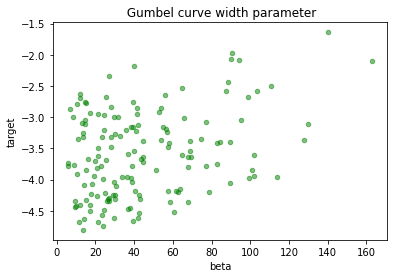

In [21]:
df_final.plot(kind="scatter", x="beta", y="target", alpha=1/2, color='green')

plt.title(' Gumbel curve width parameter')


### Prediction 

If we start using this model for predictions, we need to split the dataset. For now we are still exploring so we use all the data for analysis. The feature columns are all the columns added to the right of our dataset with estimations.

In [22]:
from sklearn.model_selection import train_test_split

featcols = len(df_prog.columns)
features = df_final.columns[featcols:]
## This case just to make for another prediction model if we want to use. 
x_trn, x_tst, y_trn, y_tst = train_test_split(df_final[features], df_final['mcpop'])

x_trn = df_final[features]
y_trn = df_final['target']

In [1]:
# !pip install xgboost 
#  incase not so many jupyter don't have Xgboost

In [ ]:
#In Here we focus on checking the fitting of the algorthm XGBoost has been popular used in many machine learning problem 
#XGBoost dominates structured or tabular datasets on classification and regression predictive modeling problems.

Create the XGBoost data structure for training and check parameters to prevent overfitting on this small dataset. Then check the error rate between the test and train data used internally by XGBoost. If the test error rate is much higher, we are overfitting.

<AxesSubplot:>

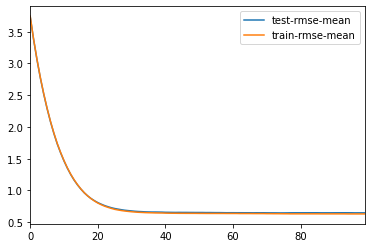

In [24]:
import xgboost as xgb

dtrn = xgb.DMatrix(x_trn, label=y_trn)
#dtst = xgb.DMatrix(x_tst)

## Apply the xgb.Dmatrix to know the value. 
## Why Xgboost is the best for this one ? Error identified this method is better other methos. 
params = {
    #'objective':'reg:squarederror',
    'eta':1/10,
    'gamma':5,
    #'min_child_weight':10,
    #'tree_method':'hist',
    #'seed':0,
    #'max_depth':3,
    'colsample_bytree':0.7,
    'subsample':0.7,
}

hist = xgb.cv(params, dtrn, nfold=10, as_pandas=True, num_boost_round=100, verbose_eval=10, early_stopping_rounds=1000, show_stdv=True, seed=0)
hist.plot(y=["test-rmse-mean", "train-rmse-mean"])

When we train with xgsboost it brought the best opportunity for high good fitting level. As expectation the most suitable test and train should match toghether then we decided to make this strong method of XGSboost.

In [25]:
x_tst.fillna(x_trn.mean(), inplace=True)

x_tst._is_view


False

Train the model using the parameters found above and show the feature importance. Note that this can be both a positive and negative influence. Other as Mr.Herman my teacher from Class recommend me to compare with other dataset. It possible to slow down in here to prevent Doubt issues. 

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

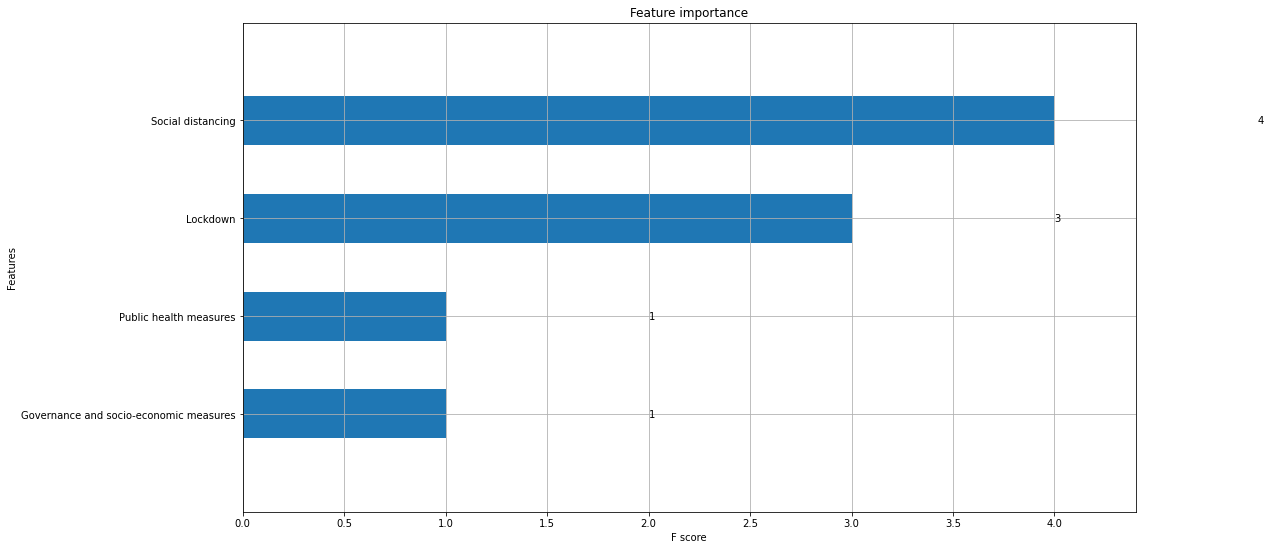

In [27]:
bst = xgb.train(params, dtrn, num_boost_round=100, verbose_eval=1)

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1, 1, figsize=(16, 9))

xgb.plot_importance(bst, ax=ax, height=1/2)

The actual XGBoost model is an ensemble of decision trees that can be hard to interpret. SHAP is an analysis library that shows the influence of factors based on this model. First we choose a country and see how the estimate relates to measures.

In [28]:
country = 'NL'
#here we focus on the country of netherland.   

rownum = df_final[df_final['iso2'] == country].index[0]

import shap

shap.initjs()

explainer = shap.TreeExplainer(bst, x_trn)
shap_values = explainer.shap_values(x_trn)

shap.force_plot(explainer.expected_value, shap_values[rownum], x_trn.loc[rownum])

When we take all these plots, rotate and stack them we get a global view of the model We can see the SHAP of public health stay on 146 and social distancing take the highest number with 147.5. Lockdown stay with 254. Next we can look at the tredning line force_plot to see they are moving. 

In [29]:
shap.force_plot(explainer.expected_value, shap_values, x_trn)

Looking at individual measures we can visualize their impact on model output.Strongly impact will be able to public in here. 

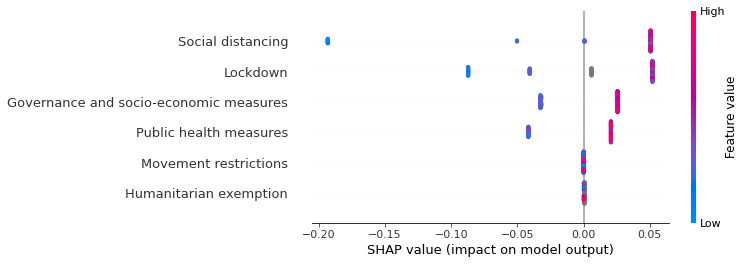

In [30]:
shap.summary_plot(shap_values, x_trn)

Finally, a similar plot to the importance plot above shows the explanatory value of measures.

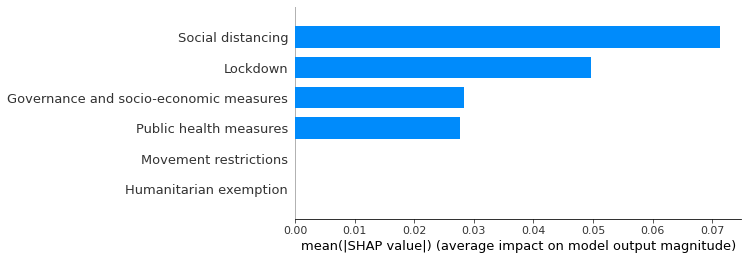

In [31]:
shap.summary_plot(shap_values, x_trn, plot_type="bar")
#Load the shap of average imact on model output. 
#Apply plot type

## Result conclusion
Seeking for explore adventure AI of analytic with MarkAi Blog. 
* Support Corona Finding the best solution. 

We can see the Shap value show that Social distance stays at the peak of 0.07, which means produced a higher score to bring the excellent measure during the pandemic. Look further, and lockdown is working well as the 2nd level of effectiveness in data. They are all possible to apply in real life because those data are applied to the global. In another way it is just implemented by data analytic to consider of scientific way. we will need strong support from different factor  in the science of epidemic to give the better multiple result and highly effective outcome.